<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#安装依赖包" data-toc-modified-id="安装依赖包-1">安装依赖包</a></span></li><li><span><a href="#数据清洗" data-toc-modified-id="数据清洗-2">数据清洗</a></span></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-3">数据可视化</a></span></li><li><span><a href="#构建房价预测模型" data-toc-modified-id="构建房价预测模型-4">构建房价预测模型</a></span><ul class="toc-item"><li><span><a href="#多特征模型训练（多元线性回归）" data-toc-modified-id="多特征模型训练（多元线性回归）-4.1">多特征模型训练（多元线性回归）</a></span></li><li><span><a href="#假设验证法选出最佳特征组合" data-toc-modified-id="假设验证法选出最佳特征组合-4.2">假设验证法选出最佳特征组合</a></span></li></ul></li><li><span><a href="#房价的预测" data-toc-modified-id="房价的预测-5">房价的预测</a></span></li></ul></div>

## 安装依赖包

In [2]:
!pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [30]:
!pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ---------------------------------------- 9.2/9.2 MB 14.3 MB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 795.7 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## 数据清洗

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'house_information.csv') # 如果用pandas打不开数据，可以使用记事本打开把编码格式改成utf-8另存
data.head()

,index,单价,小区名称,建筑面积,户型,房屋总价,朝向,楼层,装修
0,0,41117元/平米,仙岳山庄,104.58平米,2室2厅2卫,430万,南北,低层,简装修
1,1,63489元/平米,禹洲华侨海景城,201.61平米,5室2厅2卫,1280万,东北,高层,豪华装修
2,2,58339元/平米,汇丰家园,128.56平米,3室2厅2卫,750万,南北,中层,中装修
3,3,46739元/平米,嘉盛豪园,92平米,3室2厅1卫,430万,南北,中层,精装修
4,4,43952元/平米,金帝花园,118.31平米,3室2厅2卫,520万,南北,高层,简装修


In [3]:
data.drop('index',axis=1,inplace=True) # 删除index列（用del更方便）
data.head()

,单价,小区名称,建筑面积,户型,房屋总价,朝向,楼层,装修
0,41117元/平米,仙岳山庄,104.58平米,2室2厅2卫,430万,南北,低层,简装修
1,63489元/平米,禹洲华侨海景城,201.61平米,5室2厅2卫,1280万,东北,高层,豪华装修
2,58339元/平米,汇丰家园,128.56平米,3室2厅2卫,750万,南北,中层,中装修
3,46739元/平米,嘉盛豪园,92平米,3室2厅1卫,430万,南北,中层,精装修
4,43952元/平米,金帝花园,118.31平米,3室2厅2卫,520万,南北,高层,简装修


In [4]:
# Series的extract支持正则匹配抽取，返回的值是字符串
data[['室','厅','卫']] = data['户型'].str.extract(r'(\d+)室(\d+)厅(\d+)卫')

In [5]:
# 把字符串格式转化为float，并删除户型
data['室'] = data['室'].astype(float)
data['厅'] = data['厅'].astype(float)
data['卫'] = data['卫'].astype(float)
del data['户型']
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117元/平米,仙岳山庄,104.58平米,430万,南北,低层,简装修,2.0,2.0,2.0
1,63489元/平米,禹洲华侨海景城,201.61平米,1280万,东北,高层,豪华装修,5.0,2.0,2.0
2,58339元/平米,汇丰家园,128.56平米,750万,南北,中层,中装修,3.0,2.0,2.0
3,46739元/平米,嘉盛豪园,92平米,430万,南北,中层,精装修,3.0,2.0,1.0
4,43952元/平米,金帝花园,118.31平米,520万,南北,高层,简装修,3.0,2.0,2.0


In [6]:
# 将建筑面积后的平方米去除，并将数据类型改成浮点型
data['建筑面积'] = data['建筑面积'].map(lambda e:e.replace('平米',''))# Series中的map
data['建筑面积'] = data['建筑面积'].astype(float)
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117元/平米,仙岳山庄,104.58,430万,南北,低层,简装修,2.0,2.0,2.0
1,63489元/平米,禹洲华侨海景城,201.61,1280万,东北,高层,豪华装修,5.0,2.0,2.0
2,58339元/平米,汇丰家园,128.56,750万,南北,中层,中装修,3.0,2.0,2.0
3,46739元/平米,嘉盛豪园,92.00,430万,南北,中层,精装修,3.0,2.0,1.0
4,43952元/平米,金帝花园,118.31,520万,南北,高层,简装修,3.0,2.0,2.0


In [7]:
# 将单价后的元/平米去除，并将数据类型改成浮点型
data['单价'] = data['单价'].map(lambda e:e.replace(r'元/平米',''))
data['单价'] = data['单价'].astype(float)
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117.0,仙岳山庄,104.58,430万,南北,低层,简装修,2.0,2.0,2.0
1,63489.0,禹洲华侨海景城,201.61,1280万,东北,高层,豪华装修,5.0,2.0,2.0
2,58339.0,汇丰家园,128.56,750万,南北,中层,中装修,3.0,2.0,2.0
3,46739.0,嘉盛豪园,92.00,430万,南北,中层,精装修,3.0,2.0,1.0
4,43952.0,金帝花园,118.31,520万,南北,高层,简装修,3.0,2.0,2.0


In [8]:
# 将房屋总价后的万去除，并将数据类型改成浮点型
data['房屋总价'] = data['房屋总价'].map(lambda e:e.replace('万',''))
data['房屋总价'] = data['房屋总价'].astype(float)
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117.0,仙岳山庄,104.58,430.0,南北,低层,简装修,2.0,2.0,2.0
1,63489.0,禹洲华侨海景城,201.61,1280.0,东北,高层,豪华装修,5.0,2.0,2.0
2,58339.0,汇丰家园,128.56,750.0,南北,中层,中装修,3.0,2.0,2.0
3,46739.0,嘉盛豪园,92.00,430.0,南北,中层,精装修,3.0,2.0,1.0
4,43952.0,金帝花园,118.31,520.0,南北,高层,简装修,3.0,2.0,2.0


In [9]:
# 使用pd.get_dummies() 量化数据
data_direction = pd.get_dummies(data['朝向'])
data_direction.head()

,东,东北,东南,东西,北,南,南北,暂无,西,西北,西南
0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [10]:
# 使用pd.get_dummies() 量化数据
data_floor = pd.get_dummies(data['楼层'])
data_floor.head()

,中层,低层,高层
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [11]:
# 使用pd.get_dummies() 量化数据
data_decoration = pd.get_dummies(data['装修'])
data_decoration.head()

,中装修,暂无,毛坯,简装修,精装修,豪华装修
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [12]:
# 使用pd.concat矩阵拼接，axis=1：水平拼接
data = pd.concat([data,data_direction,data_floor,data_decoration],axis=1) 

In [13]:
# 拼接后的列名
data.columns

Index(['单价', '小区名称', '建筑面积', '房屋总价', '朝向', '楼层', '装修', '室', '厅', '卫', '东',
       '东北', '东南', '东西', '北', '南', '南北', '暂无', '西', '西北', '西南', '中层', '低层',
       '高层', '中装修', '暂无', '毛坯', '简装修', '精装修', '豪华装修'],
      dtype='object')

In [14]:
# 特征帅选
del data['小区名称']
del data['朝向']
del data['楼层']
del data['装修']
del data['东西']
del data['南北']
del data['暂无'] # 两列都删除
del data['中层'] # 多重共线性问题（线性回归）
del data['中装修']
data.columns

Index(['单价', '建筑面积', '房屋总价', '室', '厅', '卫', '东', '东北', '东南', '北', '南', '西',
       '西北', '西南', '低层', '高层', '毛坯', '简装修', '精装修', '豪华装修'],
      dtype='object')

In [15]:
data.head()

,单价,建筑面积,房屋总价,室,厅,卫,东,东北,东南,北,南,西,西北,西南,低层,高层,毛坯,简装修,精装修,豪华装修
0,41117.0,104.58,430.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,63489.0,201.61,1280.0,5.0,2.0,2.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,58339.0,128.56,750.0,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,46739.0,92.00,430.0,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,43952.0,118.31,520.0,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [16]:
data.info() # 发现 室厅卫中 有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5830 entries, 0 to 5829
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   单价      5830 non-null   float64
 1   建筑面积    5830 non-null   float64
 2   房屋总价    5830 non-null   float64
 3   室       5748 non-null   float64
 4   厅       5748 non-null   float64
 5   卫       5748 non-null   float64
 6   东       5830 non-null   uint8  
 7   东北      5830 non-null   uint8  
 8   东南      5830 non-null   uint8  
 9   北       5830 non-null   uint8  
 10  南       5830 non-null   uint8  
 11  西       5830 non-null   uint8  
 12  西北      5830 non-null   uint8  
 13  西南      5830 non-null   uint8  
 14  低层      5830 non-null   uint8  
 15  高层      5830 non-null   uint8  
 16  毛坯      5830 non-null   uint8  
 17  简装修     5830 non-null   uint8  
 18  精装修     5830 non-null   uint8  
 19  豪华装修    5830 non-null   uint8  
dtypes: float64(6), uint8(14)
memory usage: 353.1 KB


In [17]:
# 删除缺失值
data.dropna(inplace=True)
data.info()                       # 到这里数据预处理完毕

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 0 to 5829
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   单价      5748 non-null   float64
 1   建筑面积    5748 non-null   float64
 2   房屋总价    5748 non-null   float64
 3   室       5748 non-null   float64
 4   厅       5748 non-null   float64
 5   卫       5748 non-null   float64
 6   东       5748 non-null   uint8  
 7   东北      5748 non-null   uint8  
 8   东南      5748 non-null   uint8  
 9   北       5748 non-null   uint8  
 10  南       5748 non-null   uint8  
 11  西       5748 non-null   uint8  
 12  西北      5748 non-null   uint8  
 13  西南      5748 non-null   uint8  
 14  低层      5748 non-null   uint8  
 15  高层      5748 non-null   uint8  
 16  毛坯      5748 non-null   uint8  
 17  简装修     5748 non-null   uint8  
 18  精装修     5748 non-null   uint8  
 19  豪华装修    5748 non-null   uint8  
dtypes: float64(6), uint8(14)
memory usage: 392.9 KB


## 数据可视化

In [18]:
data['建筑面积']

0       104.58
1       201.61
2       128.56
3        92.00
4       118.31
         ...  
5825    152.22
5826    433.00
5827     47.00
5828    117.00
5829     95.50
Name: 建筑面积, Length: 5748, dtype: float64

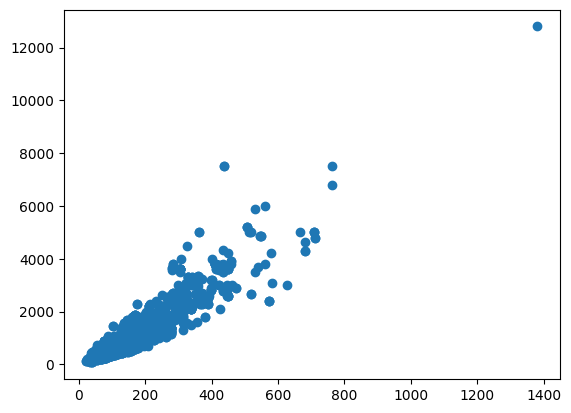

In [19]:
import matplotlib.pyplot as plt
area = data['建筑面积']
price = data['房屋总价']
plt.scatter(area,price)
plt.show() # 有离群点数据，对线性分析不利，需要过滤

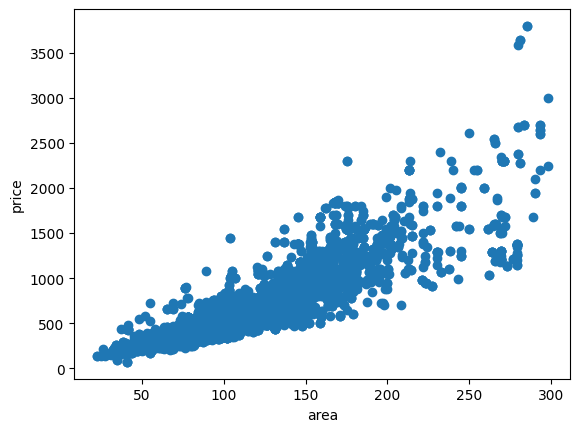

In [20]:
df = data[data['建筑面积'] <=300] # 正常住宅面积小于等于300平米
area = df['建筑面积']
price = df['房屋总价']
#print(area.count()) #过滤后的数据量
plt.scatter(area,price)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

## 构建房价预测模型

In [21]:
# 先根据建筑面积和房屋总价训练模型（一元线性回归）
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
area = np.array(area).reshape(-1,1) # 这里需要注意新版的sklearn需要将数据转换为矩阵才能进行计算
price = np.array(price).reshape(-1,1)
# 训练模型
model = linear.fit(area,price)
# 打印截距和回归系数
print(model.intercept_, model.coef_)

[-187.73888919] [[7.39200324]]


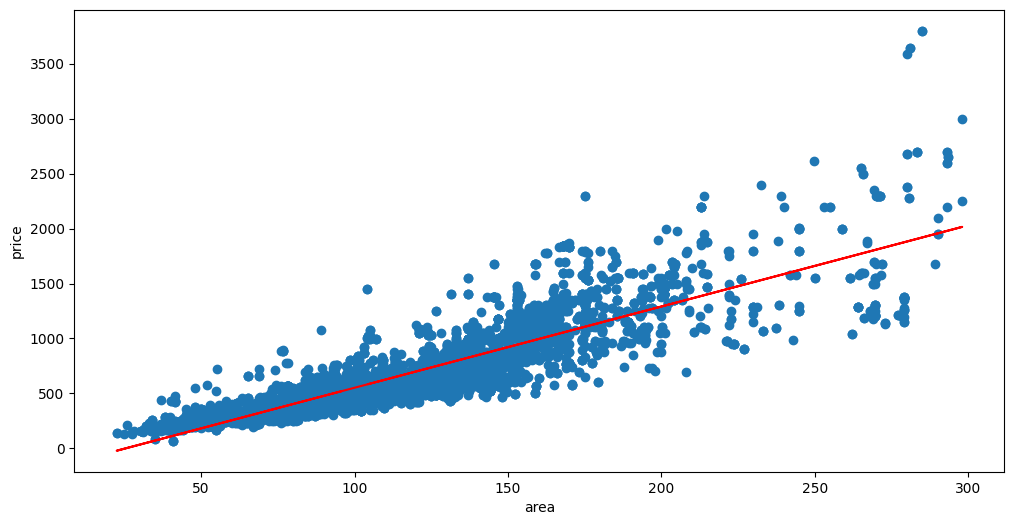

In [22]:
# 线性回归可视化(数据拟合)
linear_p = model.predict(area)
plt.figure(figsize=(12,6))
plt.scatter(area,price)
plt.plot(area,linear_p,'red')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

### 多特征模型训练（多元线性回归）

In [23]:
cols = ['建筑面积','室', '厅', '卫', '东', '东北', '东南', '北', '南', '西',
       '西北', '西南', '低层', '高层', '毛坯', '简装修', '精装修', '豪华装修']

In [24]:
X = df[cols]
X.head()

,建筑面积,室,厅,卫,东,东北,东南,北,南,西,西北,西南,低层,高层,毛坯,简装修,精装修,豪华装修
0,104.58,2.0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,201.61,5.0,2.0,2.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,128.56,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,92.00,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,118.31,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [25]:
y = df['房屋总价']
y.head()

0     430.0
1    1280.0
2     750.0
3     430.0
4     520.0
Name: 房屋总价, dtype: float64

In [26]:
print(type(X))
print(type(y))
# 使用train_test_split进行交叉验证
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4406, 18) (4406,)
(1102, 18) (1102,)


In [27]:
# 模型训练
linear = LinearRegression()
model = linear.fit(x_train,y_train)
print(model.intercept_, model.coef_)

-194.10059828632757 [  6.81080385  32.66440227 -36.27370796   8.17388714  22.82870564
 -34.63169345   0.9396494   31.52349203  73.23243807  36.57946634
 -20.85576479  35.85073408   4.13506426 -10.09803905  70.75146155
  -3.6000263   48.66249505 124.16793037]


In [28]:
# 模型性能评分
price_end = model.predict(x_test)
score = model.score(x_test,y_test) 
print("模型得分：",score)# 一般模型在0.6以上就表现的不错

模型得分： 0.7639142687890217


### 假设验证法选出最佳特征组合

In [31]:
# 使用假设验证法，选出最佳特征组合
cols = ['建筑面积','室', '厅', '卫', '东', '东北', '东南', '北', '南', '西',
       '西北', '西南', '低层', '高层', '毛坯', '简装修', '精装修', '豪华装修']
import statsmodels.api as sm
Y = df['房屋总价']
X = df[cols]
X_ = sm.add_constant(X) #增加一列值为1的const列，保证偏置项的正常
#print(X_)
# 使用最小平方法
result = sm.OLS(Y,X_)
# 使用fit方法进行计算
summary = result.fit()
# 调用summary2方法打印出假设验证信息（性能指标）
summary.summary2() # R-squared:模型评分 AIC：组合完越小越好

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.771     
Dependent Variable: 房屋总价             AIC:                74021.4015
Date:               2023-02-16 23:38 BIC:                74147.0667
No. Observations:   5508             Log-Likelihood:     -36992.   
Df Model:           18               F-statistic:        1030.     
Df Residuals:       5489             Prob (F-statistic): 0.00      
R-squared:          0.772            Scale:              40037.    
--------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const    -190.5740   14.3527  -13.2779  0.0000  -218.7111  -162.4370
建筑面积        6.7798    0.1065   63.6645  0.0000     6.5711     6.9886
室          32.4766    4.8180    6.7407  0.0000    23.0315    41.9218
厅         -36.6403    7.4305   -4.9311  0.0000   -51.2070   -22.0735
卫           5.9103    5.9003    1.0017  0.3165    -5.6565    17.4771
东          23.4166   13.2163    1.7718  0.0765    -2.4925    49.3258
东北        -34.1670   17.2426   -1.9815  0.0476   -67.9694    -0.3645
东南          9.0724   10.6111    0.8550  0.3926   -11.7295    29.8744
北          25.5771   19.4207    1.3170  0.1879   -12.4952    63.6493
南          69.3747   11.3337    6.1211  0.0000    47.1560    91.5933
西          28.2927   24.8301    1.1395  0.2546   -20.3842    76.9695
西北        -21.8337   15.8412   -1.3783  0.1682   -52.8888     9.2213
西南         33.8956   13.4285    2.5241  0.0116     7.5703    60.2208
低层          8.6321    6.8894    1.2530  0.2103    -4.8738    22.1381
高层         -8.0947    6.3467   -1.2754  0.2022   -20.5367     4.3472
毛坯         86.0976   15.2708    5.6381  0.0000    56.1608   116.0343
简装修        -1.7023    8.4182   -0.2022  0.8398   -18.2053    14.8007
精装修        51.9228    8.3723    6.2018  0.0000    35.5098    68.3358
豪华装修      113.2164   12.8088    8.8389  0.0000    88.1060   138.3267
-------------------------------------------------------------------
Omnibus:             1795.844      Durbin-Watson:         2.046    
Prob(Omnibus):       0.000         Jarque-Bera (JB):      16937.679
Skew:                1.283         Prob(JB):              0.000    
Kurtosis:            11.199        Condition No.:         1177     
===================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

名词解释

- coef 回归系数
- Std.Err 标准差
- t 虚无假设成立时的t值
- P>|t| 虚无假设成立时的概率值
- [0.025,0.975] 97.5%置信估计区间
- 要做假设性验证，首先要设置显著性标准。
- a.假设显著性标准是0.01
- b.推翻虚无假设的标准是p<0.01
- c.上面的SqFt的t=9.2416，P(>5) = 0.0000 < 0.01,因此虚无假设被推翻（这里的虚无假设是SqFt对price的回归系数为0，即SqFt与price不相关）

F统计
- 回归平方和Regression Square Sum[RSS]:依变量的变化归咎于回归模型A=sum((y-y_)^2
- 误差平方和Error Square Sum[ESS]:依变量的变化归咎于线性模型B=sum((y-y_)^2
- 总的平方和Total Square Sum[TSS]:依变量整体变化C=A+B
- 回归平方平均Model Mean Square:=RSS/Regression d.f(k) k=自变量的数量
- 误差平方平均Error Mean square:=ESS/Error d.f(n-k-1) n=观测值得数量
- F统计F=Model Mean Square /Error Mean Square
- F值越大越好，Prob(F-statistic)越小越好

R Square
- 回归可以解释变量比例，可以作为自变量预测因变量准确度的指标
- SSE(残差平方和) = sum((y-y_)^2)
- SST(整体平方和）= sum((yi-yavg)^2
- R^2 = 1-SEE/SST 一般要大于0.6,0.7才算好

Adjust R Square
- R^2 = 1-SSE/SST SSE最小，推导出R^2不会递减
- yi = b1x1 + b2x2 +...+bkxk+...增加任何一个变量都会增加R^2
- Adj R^2 = 1-(1-R^2) * ((n-1)/(n-p-1))
- n为总体大小，p为回归因子个数

AIC/BIC
- AIC(The Akaike Information Criterion)= 2K + nln(SSE/n) K是参数数量，n是观察数，SSE是残差平方和。
- AIC鼓励数据拟合的优良性，但是应该尽量避免过拟合，所以优先考虑的模型应该是AIC最小的哪一个，
- 赤池信息量的准则是寻找可以最好的解释数据但是包含最少自由参数的模型。

In [32]:
import itertools

list1 = [1, 2,3, 4, 5,6,7,8,9,10,11,12,13,14,15,16] #特征超过16个将发生异常
list2 = []
for i in range(1, len(list1)+1):
    iter1 = itertools.combinations(list1, i)
    list2.append(list(iter1))
#print(list2)

In [33]:
import itertools
# 使用itertools，找出AIC最小值的特征组合作为模型训练的特征
# 寻找最小AIC值的特征组合
fileds = ['建筑面积','室', '厅', '卫', '东','北', '南', '西','低层', '高层', '毛坯', '简装修', '精装修', '豪华装修']
acis = {}
for i in range(1,len(fileds)+1):
    for virables in itertools.combinations(fileds,i): #从fileds中随机选择i个特征机型组合，返回的virables为元组类型
        x1 = sm.add_constant(df[list(virables)])
        x2 = sm.OLS(Y,x1)
        res = x2.fit()
        acis[virables] = res.aic # AIC评分越小越好

In [34]:
from collections import Counter
# 对字典进行统计
counter = Counter(acis)
# 降序选出AIC最小的10个数，也就是最佳特征组合
counter.most_common()[-10:] 

[(('建筑面积', '室', '厅', '东', '南', '西', '低层', '毛坯', '精装修', '豪华装修'),
  74023.56464247877),
 (('建筑面积', '室', '厅', '东', '北', '南', '西', '高层', '毛坯', '精装修', '豪华装修'),
  74023.41564227329),
 (('建筑面积', '室', '厅', '卫', '东', '南', '高层', '毛坯', '精装修', '豪华装修'),
  74023.36778965591),
 (('建筑面积', '室', '厅', '东', '北', '南', '低层', '高层', '毛坯', '精装修', '豪华装修'),
  74023.31766334853),
 (('建筑面积', '室', '厅', '东', '南', '西', '高层', '毛坯', '精装修', '豪华装修'),
  74023.14955002116),
 (('建筑面积', '室', '厅', '东', '北', '南', '低层', '毛坯', '精装修', '豪华装修'),
  74023.14910923649),
 (('建筑面积', '室', '厅', '东', '南', '低层', '高层', '毛坯', '精装修', '豪华装修'),
  74023.02854387014),
 (('建筑面积', '室', '厅', '东', '北', '南', '高层', '毛坯', '精装修', '豪华装修'),
  74022.91373410511),
 (('建筑面积', '室', '厅', '东', '南', '低层', '毛坯', '精装修', '豪华装修'), 74022.8722434788),
 (('建筑面积', '室', '厅', '东', '南', '高层', '毛坯', '精装修', '豪华装修'), 74022.56669895534)]

In [35]:
# 接下来使用AIC值最小的特征组合进行预测
col2 = ['建筑面积', '室', '厅', '东', '南', '高层', '毛坯', '精装修', '豪华装修']
X = df[col2]
y = df['房屋总价']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)
linear = LinearRegression()
model = linear.fit(x_train,y_train)
model.score(x_test,y_test) # 模型性能有所提高，但是提升的不明显

0.764510909319327

## 房价的预测

现在我们可以根据给定的最佳特征组合进行预测房价

In [36]:
# 假设我要买一套房子（想想就觉得很美），房子面积120平米，3室，1厅，南面，高层，精装修
my_house = [120,3,1,0,1,1,0,1,0] #根据col2特征
my_house = np.array(my_house).reshape(-1,1).T
#print(x_test)
model.predict(my_house)# 预测价格

C:\Users\Administrator\Envs\jv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([811.49301398])